In [23]:
## Titanic Survival EDA Project
# Dataset loaded directly from a URL (no local files needed).


## 1. Import Libraries



In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


## 2. Load Dataset from URL


In [25]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

df = pd.read_csv(url)

print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Dataset Info & Missing Values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing Values Per Column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Em

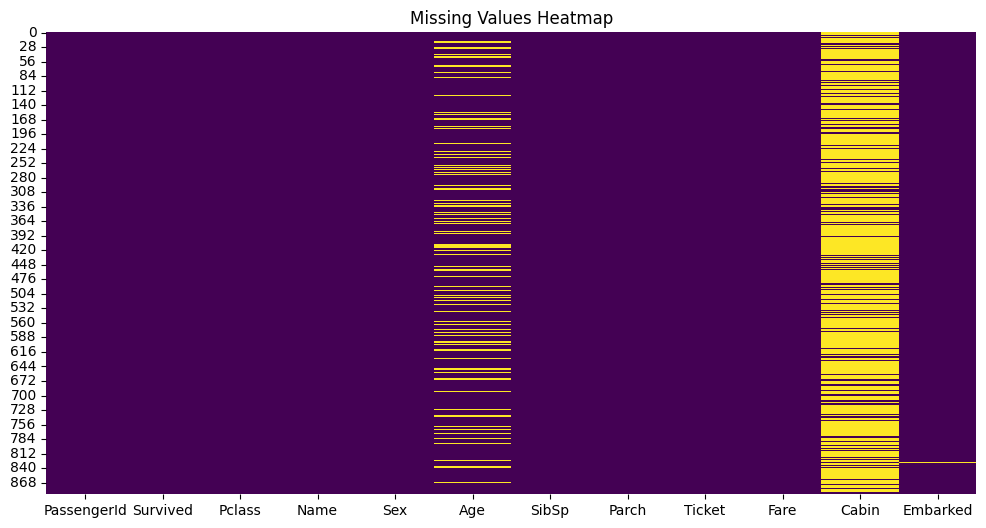

In [26]:
print(df.info())

print("\nMissing Values Per Column:")
print(df.isnull().sum())

plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


## 4. Descriptive Statistics


In [27]:
print("Numerical Summary:")
display(df.describe().T)

print("Categorical Summary:")
display(df.describe(include="O").T)


Numerical Summary:


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


Categorical Summary:


,count,unique,top,freq
Name,891,891,"Dooley, Mr. Patrick",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,G6,4
Embarked,889,3,S,644


## 5. Univariate Analysis (Distribution)


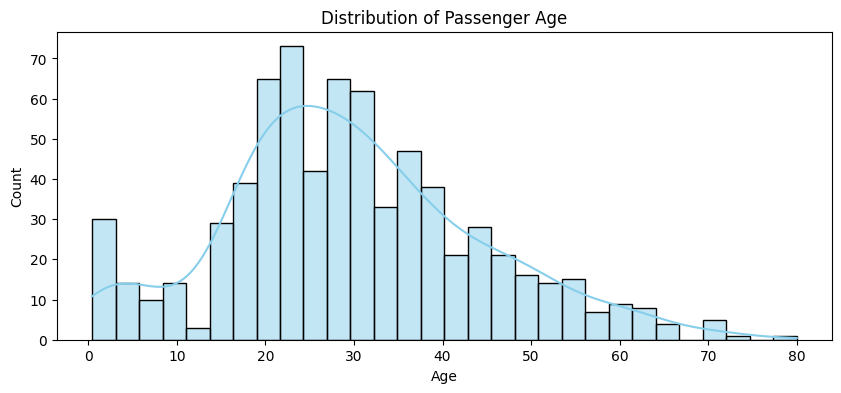

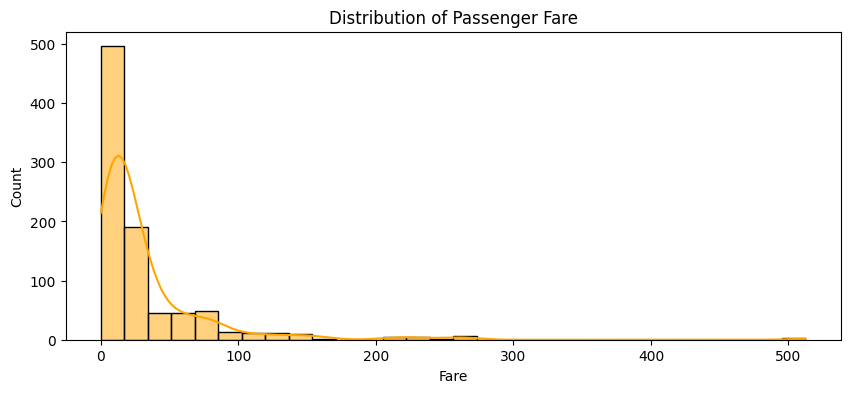

C:\Users\Aamir Khan\AppData\Local\Temp\ipykernel_21240\382172031.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Pclass", data=df, palette="muted")


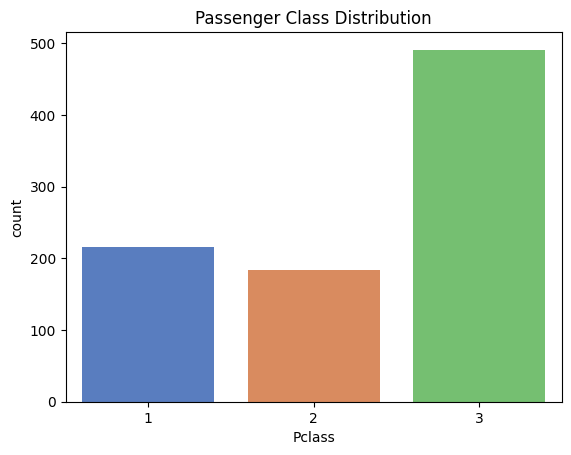

In [28]:
plt.figure(figsize=(10,4))
sns.histplot(df["Age"].dropna(), kde=True, bins=30, color="skyblue")
plt.title("Distribution of Passenger Age")
plt.show()

plt.figure(figsize=(10,4))
sns.histplot(df["Fare"], kde=True, bins=30, color="orange")
plt.title("Distribution of Passenger Fare")
plt.show()

sns.countplot(x="Pclass", data=df, palette="muted")
plt.title("Passenger Class Distribution")
plt.show()


## 6. Outlier Detection (Boxplot)


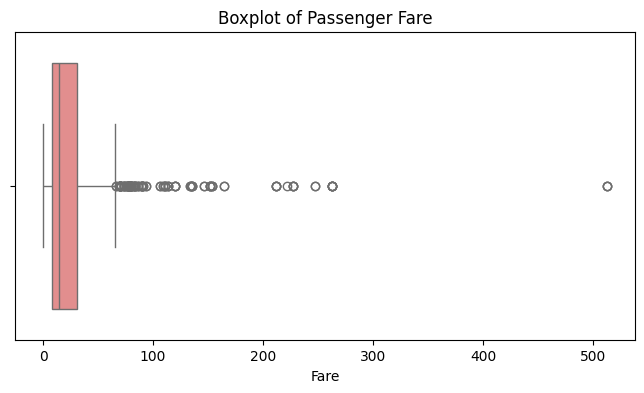

In [29]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df["Fare"], color="lightcoral")
plt.title("Boxplot of Passenger Fare")
plt.show()


## 7. Statistical Summary


In [30]:
for col in ["Age", "Fare"]:
    mean = df[col].mean()
    median = df[col].median()
    var = df[col].var()
    std = df[col].std()
    print(f"\nStats for {col}:")
    print(f" Mean = {mean:.2f}, Median = {median:.2f}")
    print(f" Variance = {var:.2f}, Std Dev = {std:.2f}")



Stats for Age:
 Mean = 29.70, Median = 28.00
 Variance = 211.02, Std Dev = 14.53

Stats for Fare:
 Mean = 32.20, Median = 14.45
 Variance = 2469.44, Std Dev = 49.69


## 8. Categorical Variable Analysis


C:\Users\Aamir Khan\AppData\Local\Temp\ipykernel_21240\3192810711.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=df, palette="Set2")


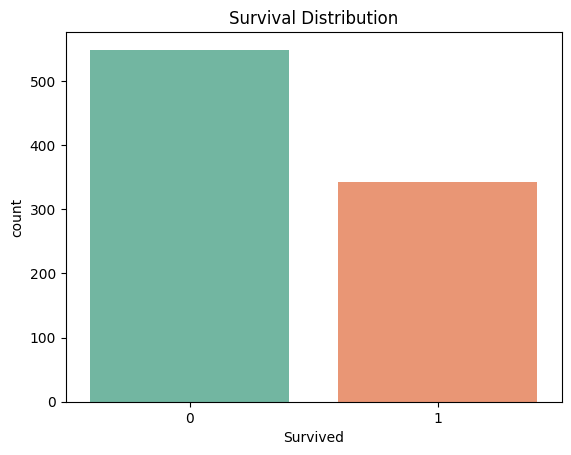

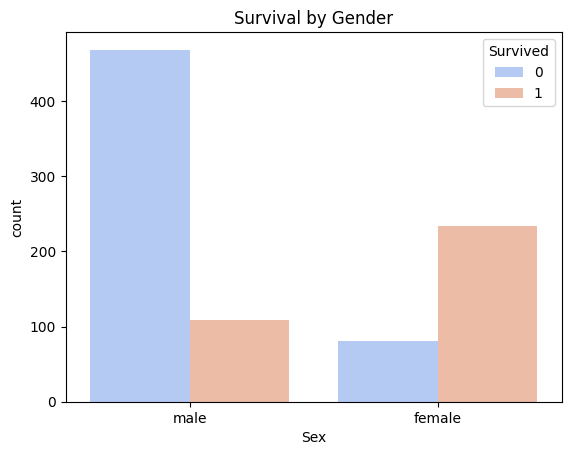

In [31]:
sns.countplot(x="Survived", data=df, palette="Set2")
plt.title("Survival Distribution")
plt.show()

sns.countplot(x="Sex", hue="Survived", data=df, palette="coolwarm")
plt.title("Survival by Gender")
plt.show()


## 9. Bivariate Analysis


C:\Users\Aamir Khan\AppData\Local\Temp\ipykernel_21240\2903425557.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Survived", y="Age", data=df, palette="Set2")


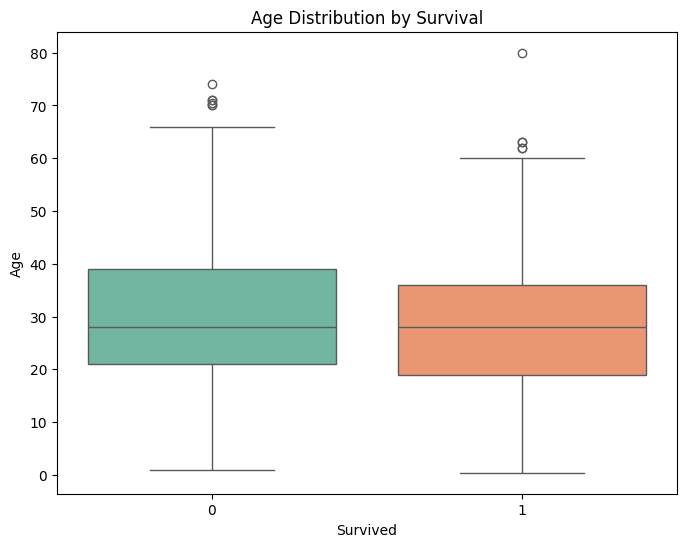

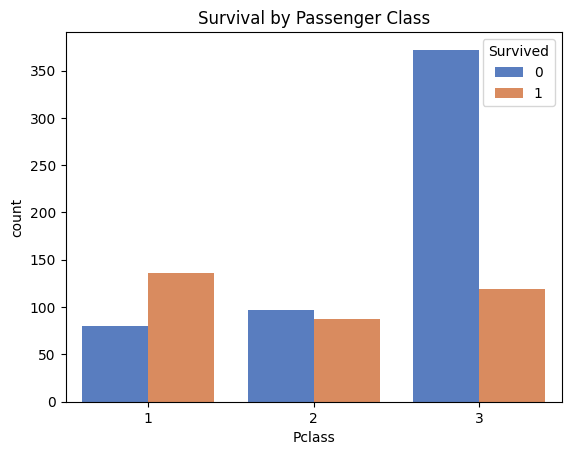

In [32]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Survived", y="Age", data=df, palette="Set2")
plt.title("Age Distribution by Survival")
plt.show()

sns.countplot(x="Pclass", hue="Survived", data=df, palette="muted")
plt.title("Survival by Passenger Class")
plt.show()


## 10. Correlation Heatmap


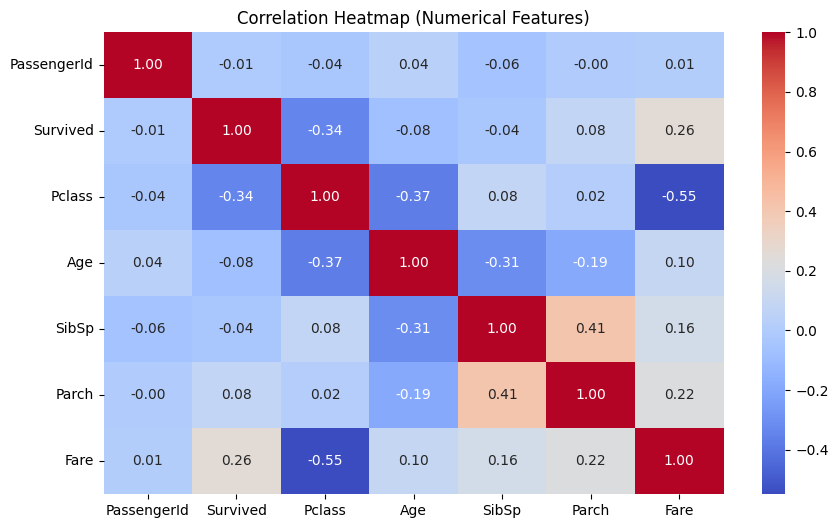

In [33]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()


## 11. Pair Plot (Multivariate Relationship)


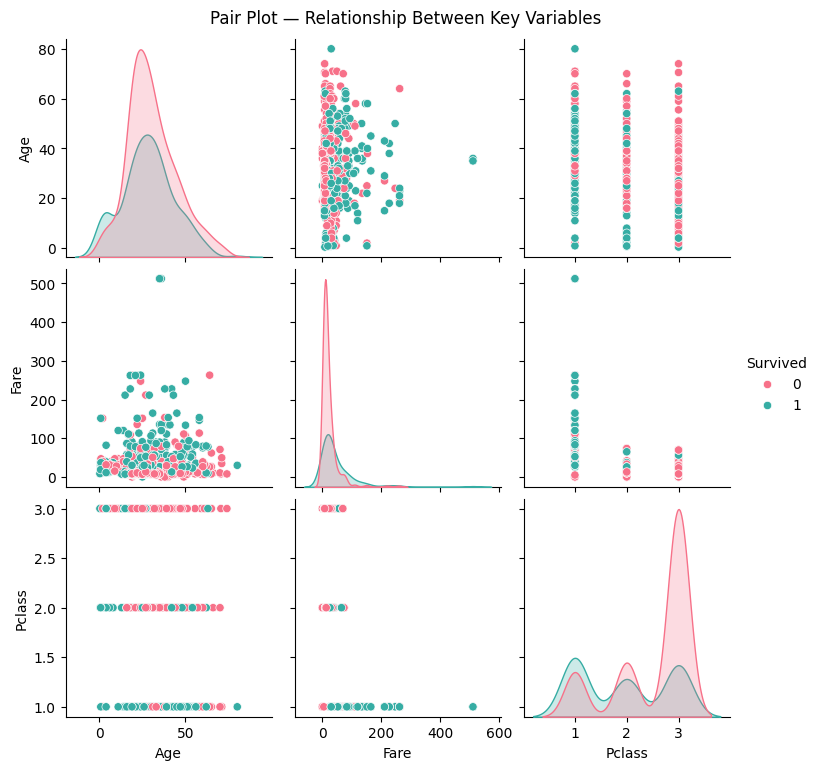

In [34]:
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived', palette='husl', diag_kind='kde')
plt.suptitle("Pair Plot — Relationship Between Key Variables", y=1.02)
plt.show()


## 12. Violin Plot (Age vs Class & Survival)


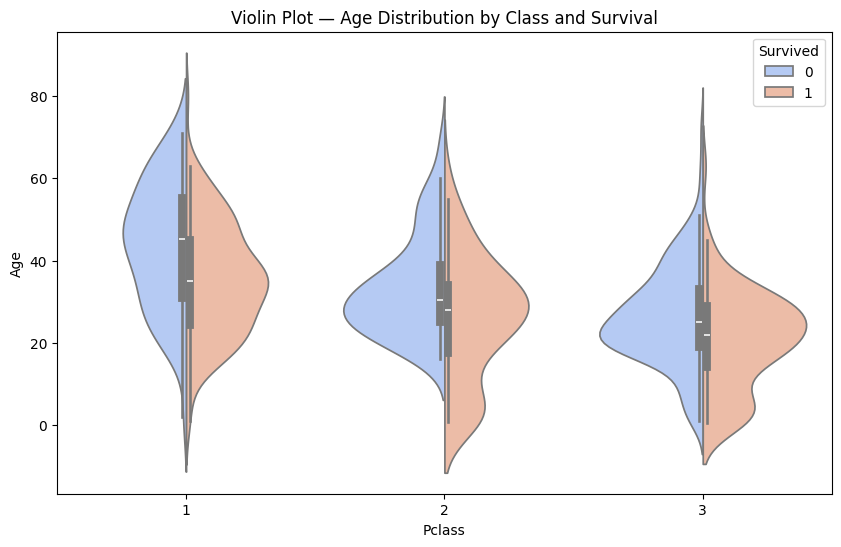

In [35]:
plt.figure(figsize=(10,6))
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=df, split=True, palette="coolwarm")
plt.title("Violin Plot — Age Distribution by Class and Survival")
plt.show()


## 13. KDE Plot (Age and Fare by Survival)


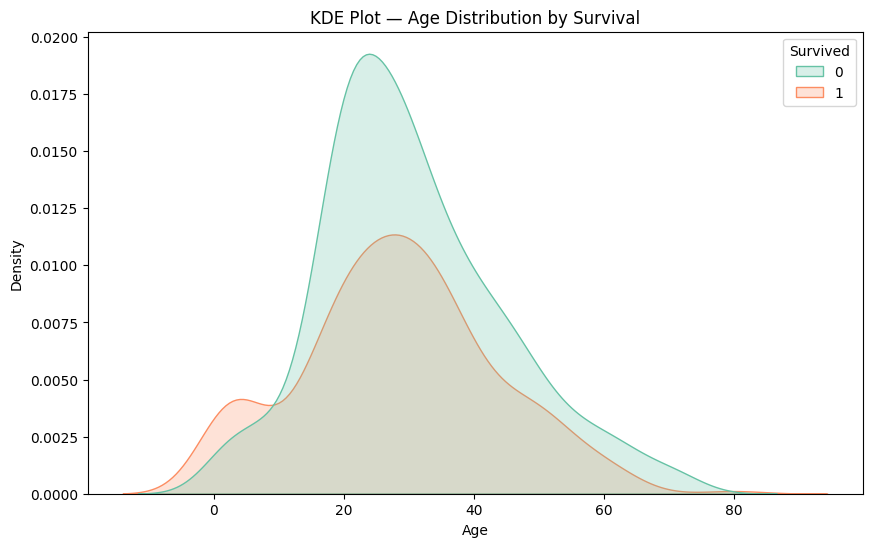

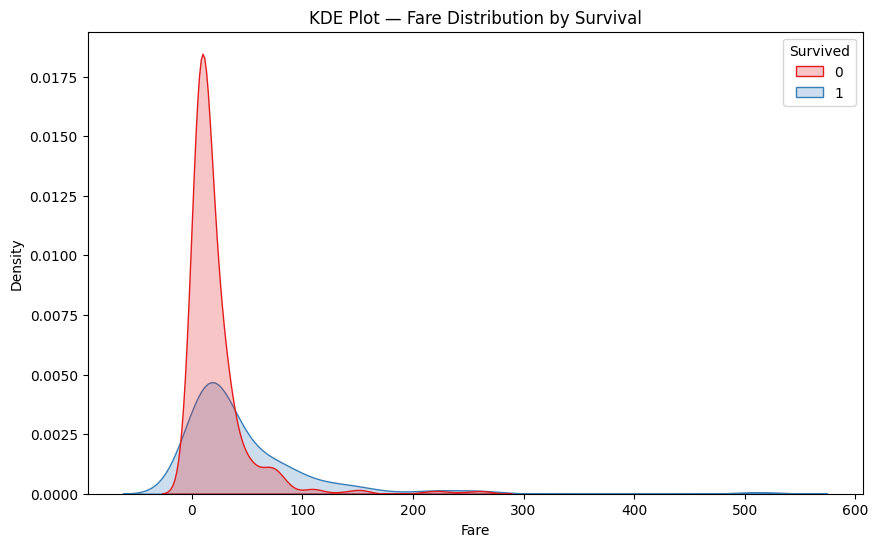

In [36]:
plt.figure(figsize=(10,6))
sns.kdeplot(x="Age", hue="Survived", data=df, fill=True, palette="Set2")
plt.title("KDE Plot — Age Distribution by Survival")
plt.show()

plt.figure(figsize=(10,6))
sns.kdeplot(x="Fare", hue="Survived", data=df, fill=True, palette="Set1")
plt.title("KDE Plot — Fare Distribution by Survival")
plt.show()


## 14. Dot Plot (Strip Plot for Age and Survival)


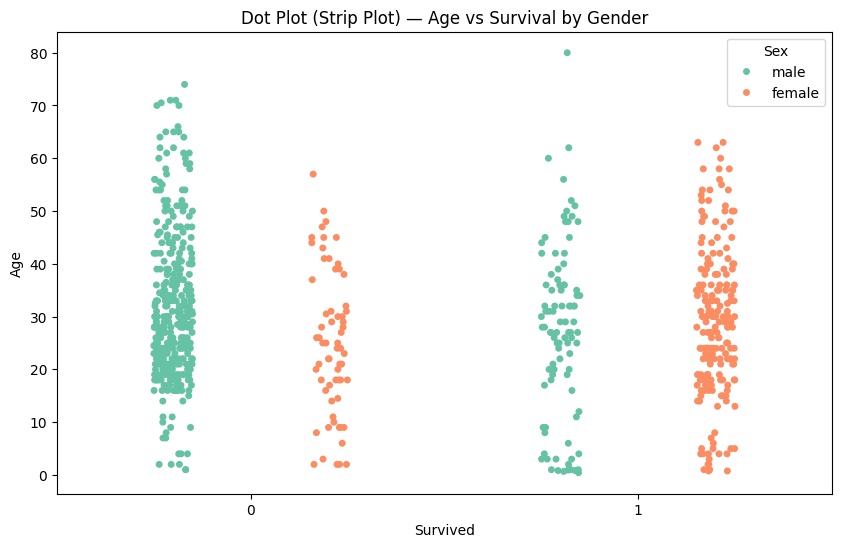

In [37]:
plt.figure(figsize=(10,6))
sns.stripplot(x="Survived", y="Age", data=df, jitter=True, hue="Sex", palette="Set2", dodge=True)
plt.title("Dot Plot (Strip Plot) — Age vs Survival by Gender")
plt.show()


## 15. Swarm Plot (More Structured Dot Plot)


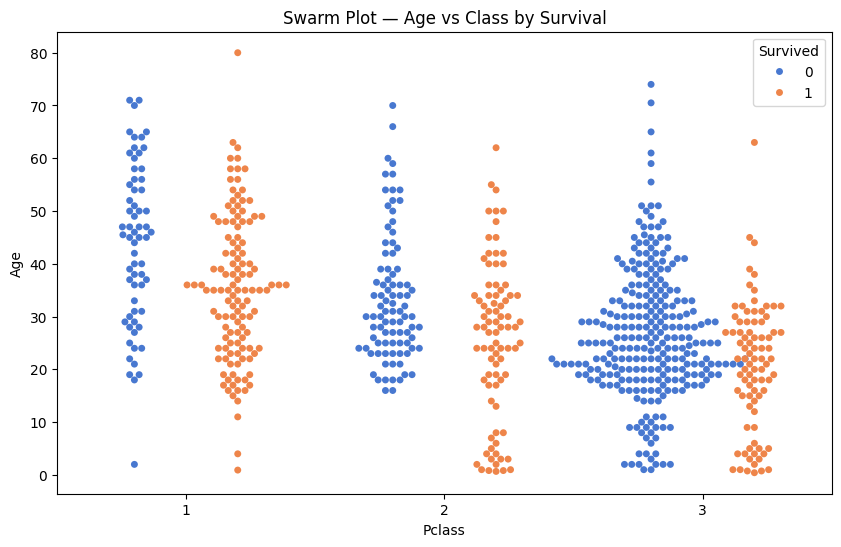

In [38]:
plt.figure(figsize=(10,6))
sns.swarmplot(x="Pclass", y="Age", hue="Survived", data=df, palette="muted", dodge=True)
plt.title("Swarm Plot — Age vs Class by Survival")
plt.show()



## 16. Bar Plot — Survival Rate by Embarkation Port


C:\Users\Aamir Khan\AppData\Local\Temp\ipykernel_21240\951762090.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Embarked", y="Survived", data=df, palette="pastel")


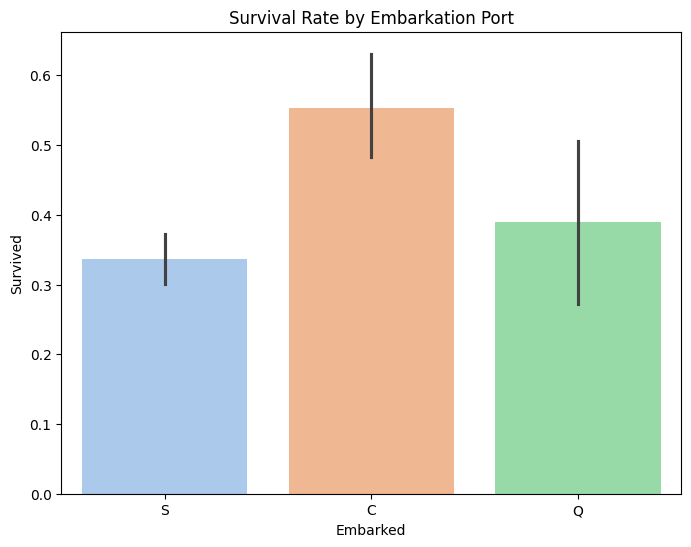

In [39]:
plt.figure(figsize=(8,6))
sns.barplot(x="Embarked", y="Survived", data=df, palette="pastel")
plt.title("Survival Rate by Embarkation Port")
plt.show()


## 17. Pie Chart — Passenger Class Proportion


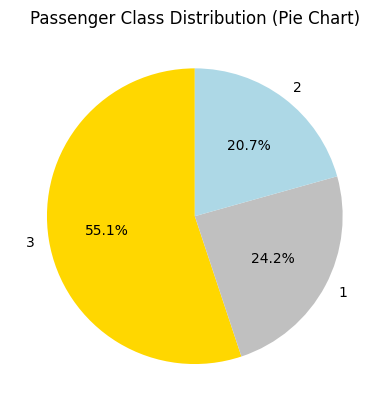

In [40]:
df["Pclass"].value_counts().plot.pie(autopct="%1.1f%%", colors=["gold", "silver", "lightblue"], startangle=90)
plt.title("Passenger Class Distribution (Pie Chart)")
plt.ylabel("")
plt.show()


## 18. Count Plot — Survival by Gender & Class


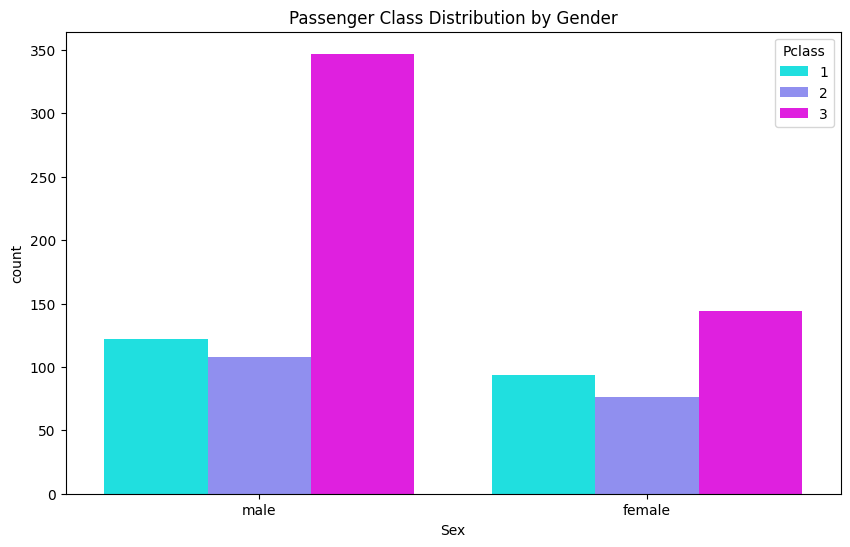

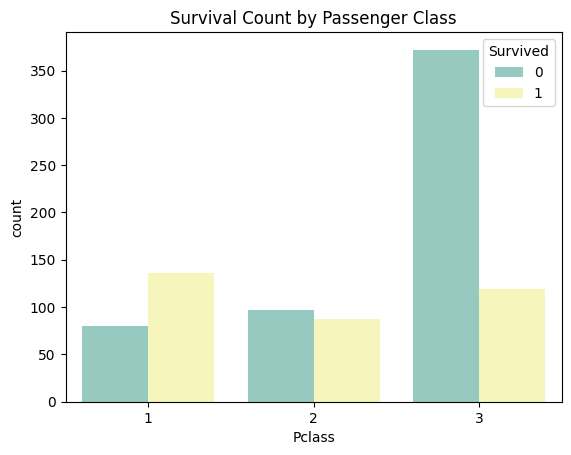

In [41]:
plt.figure(figsize=(10,6))
sns.countplot(x="Sex", hue="Pclass", data=df, palette="cool")
plt.title("Passenger Class Distribution by Gender")
plt.show()

sns.countplot(x="Pclass", hue="Survived", data=df, palette="Set3")
plt.title("Survival Count by Passenger Class")
plt.show()


## 19. Heatmap — Categorical Cross-tab (Survival vs Gender)


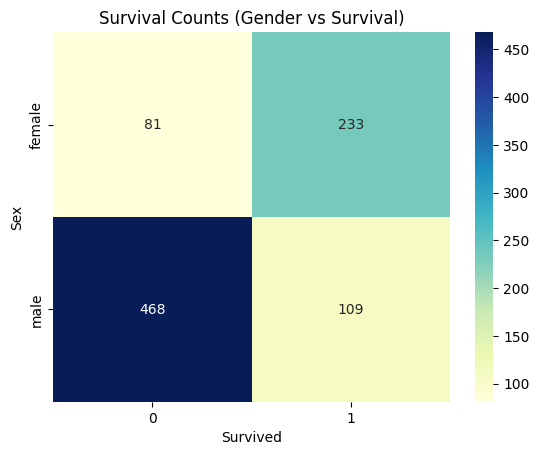

In [42]:
cross_tab = pd.crosstab(df["Sex"], df["Survived"])
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Survival Counts (Gender vs Survival)")
plt.show()


## 20. Age Distribution per Class (FacetGrid)


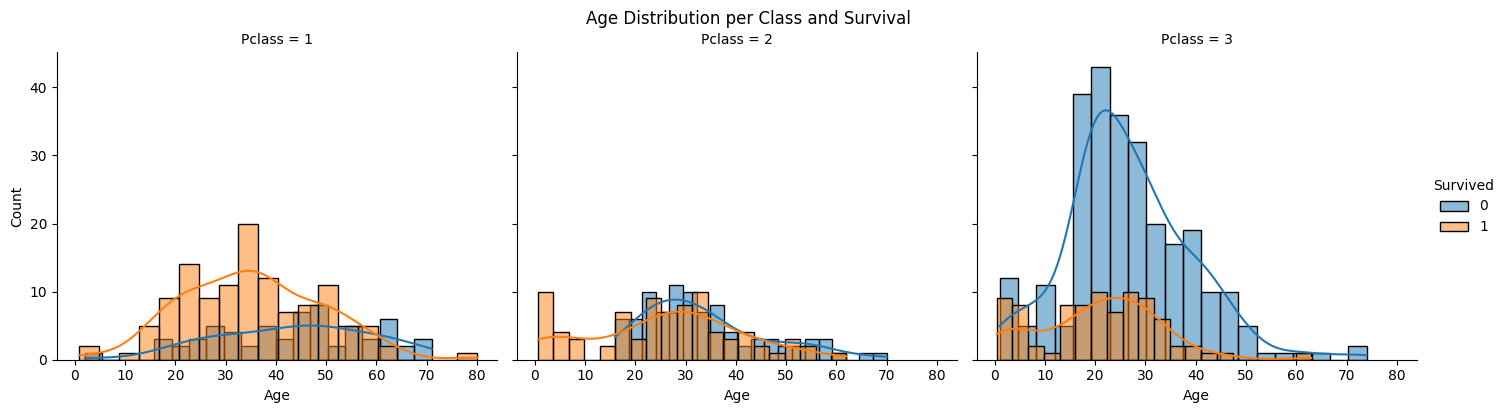

In [43]:
g = sns.FacetGrid(df, col="Pclass", hue="Survived", height=4, aspect=1.2)
g.map(sns.histplot, "Age", bins=20, kde=True)
g.add_legend()
plt.suptitle("Age Distribution per Class and Survival", y=1.02)
plt.show()


# 🧠 ... Insights & Conclusion


In [44]:
print("""
✅ Key Insights from Titanic EDA:

1. Women had a much higher survival rate than men.
2. 1st-class passengers had better chances of survival than 2nd or 3rd class.
3. Passengers who paid higher fares tended to survive more.
4. Younger passengers (especially children) had higher survival chances.
5. Embarked 'C' (Cherbourg) port passengers had a higher survival rate.
""")



✅ Key Insights from Titanic EDA:

1. Women had a much higher survival rate than men.
2. 1st-class passengers had better chances of survival than 2nd or 3rd class.
3. Passengers who paid higher fares tended to survive more.
4. Younger passengers (especially children) had higher survival chances.
5. Embarked 'C' (Cherbourg) port passengers had a higher survival rate.

